In [1]:
from robust_mean import huberReg

In [2]:
import numpy as np
import math
from sklearn.linear_model import HuberRegressor
import numpy.random as rgt
import matplotlib.pyplot as plt
# ... other necessary imports ...

# Assuming your class definition `huberReg` is already provided above

In [22]:
# Generate some sample data
n, d = 5000, 20  # Adjust n and d according to your needs
X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
truebeta = np.random.normal(0, 1, d)
truebeta /= np.linalg.norm(truebeta)
Y = X.dot(truebeta) + np.random.normal(0, 4, n)  # Linear relationship with noise
beta0 = np.zeros(d)
# Create an instance of your class
noisy_huber_regression = huberReg(X, Y)

# Run the noisy Huber regression
noisy_huber_result = noisy_huber_regression.ada_huber_reg_lowdim(beta0=beta0, maxit=1000, epsilon=0.001, eta=0.01)
print("Noisy Huber Regression Result:", noisy_huber_result[0])

# Ordinary Huber Regression for comparison
huber_reg = HuberRegressor().fit(X, Y)
ordinary_huber_coefficients = huber_reg.coef_
print("Ordinary Huber Regression Coefficients:", ordinary_huber_coefficients)

# Compare the results (You can use metrics like MSE, coefficients, predictions, etc.)

Noisy Huber Regression Result: [-1.44255445e-04 -2.31097897e-06 -2.55414889e-05  6.68474240e-05
 -2.88085652e-05 -6.60812173e-05 -7.31230275e-05  2.55773024e-05
 -1.40172032e-04 -8.34231612e-08 -6.81442356e-05 -2.07787273e-05
  1.46837752e-04 -8.68209193e-05  5.42050613e-05 -7.80696501e-05
 -1.09048302e-04  4.67095412e-05  3.09741646e-05  1.27454845e-04]
Ordinary Huber Regression Coefficients: [-1.04616412  0.03325233  0.05033107  0.44709304 -0.12455357 -0.17061779
 -0.60045687  0.25177381 -0.9223214   0.25233519 -0.60484976 -0.08801228
  0.90740146 -0.44624968  0.46716708 -0.40824595 -0.4743913   0.12572516
  0.11500742  0.73114116]


In [23]:
def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

In [24]:
l2_distance(truebeta, noisy_huber_result[0])

0.9998474803685375

In [25]:
l2_distance(truebeta, huber_reg.coef_)

2.164873855476375

In [5]:
# Function to generate data
def generate_data(n, d):
    X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
    truebeta = np.random.normal(0, 1, d)
    truebeta /= np.linalg.norm(truebeta)
    Y = X.dot(truebeta) + np.random.normal(0, 4, n)
    return X, Y, truebeta

# Function to calculate L2 distance
def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# Function to perform regression and calculate L2 error
def calculate_errors(n, d, T, delta, eta, epsilon):
    X, Y, truebeta = generate_data(n, d)
    beta0 = np.zeros(d)
    gamma = np.max(np.linalg.norm(X, axis=1))

    # Noisy Huber regression (to be implemented)
    noisy_huber_regression = huberReg(X, Y)
    # noisy_huber_result = huber_regression.noisy_huber_reg_lowdim(beta0, epsilon, T, delta, eta, gamma)
    # For demonstration purposes, using truebeta as the result
    #noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=0.01, gamma=gamma)
    noisy_huber_result = noisy_huber_regression.ada_huber_reg_lowdim(beta0=beta0, maxit=1000, eta=0.01)
    # Ordinary Huber Regression
    huber_reg = HuberRegressor().fit(X, Y)

    # Calculate L2 errors
    error_noisy_huber = l2_distance(truebeta, noisy_huber_result[0])
    error_ordinary_huber = l2_distance(truebeta, huber_reg.coef_)

    return error_noisy_huber, error_ordinary_huber

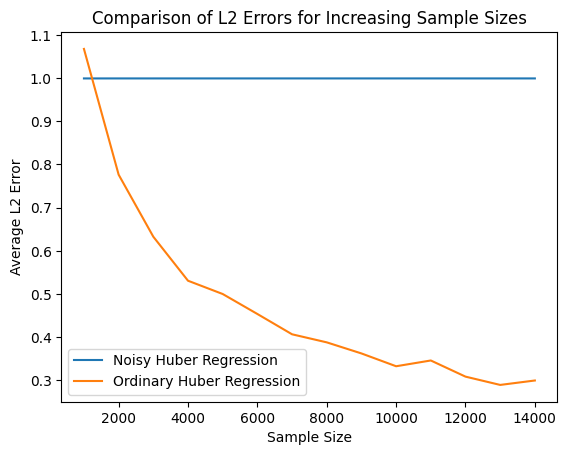

In [6]:
# Sample sizes to test
sample_sizes = np.arange(1000, 15000, 1000)
d = 5  # Number of features
T = 100
#delta = 10
eta = 0.01
epsilon = 0.5

# Store average errors
average_errors_noisy = []
average_errors_ordinary = []

# Iterate over sample sizes
for n in sample_sizes:
    errors_noisy = []
    errors_ordinary = []
    for _ in range(100):  # 100 repetitions
        error_noisy, error_ordinary = calculate_errors(n, d, T, 10/(n**1.1), eta, epsilon)
        errors_noisy.append(error_noisy)
        errors_ordinary.append(error_ordinary)

    # Compute average errors
    average_errors_noisy.append(np.mean(errors_noisy))
    average_errors_ordinary.append(np.mean(errors_ordinary))

# Plotting
plt.plot(sample_sizes, average_errors_noisy, label='Noisy Huber Regression')
plt.plot(sample_sizes, average_errors_ordinary, label='Ordinary Huber Regression')
plt.xlabel('Sample Size')
plt.ylabel('Average L2 Error')
plt.title('Comparison of L2 Errors for Increasing Sample Sizes')
plt.legend()
plt.show()


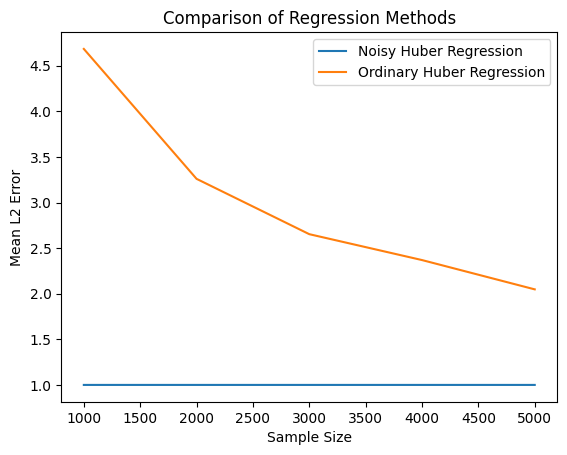

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

# Assuming huberReg is your custom class for noisy Huber regression

def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def run_experiment(n, d, repetitions, eta, epsilon):
    errors_noisy = []
    errors_ordinary = []
    
    for _ in range(repetitions):
        # Generate sample data
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)
        beta0 = np.zeros(d)

        # Noisy Huber Regression
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result, _ = noisy_huber_regression.ada_huber_reg_lowdim(beta0=beta0, maxit=1000, epsilon=epsilon, eta=eta)
        error_noisy = l2_distance(noisy_huber_result, truebeta)
        errors_noisy.append(error_noisy)

        # Ordinary Huber Regression
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        error_ordinary = l2_distance(ordinary_huber_coefficients, truebeta)
        errors_ordinary.append(error_ordinary)

    return np.mean(errors_noisy), np.mean(errors_ordinary)

# Parameters
d = 20
eta = 0.01
epsilon = 0.001
repetitions = 100
sample_sizes = [1000, 2000, 3000, 4000, 5000]  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []

for n in sample_sizes:
    mean_error_noisy, mean_error_ordinary = run_experiment(n, d, repetitions, eta, epsilon)
    mean_errors_noisy.append(mean_error_noisy)
    mean_errors_ordinary.append(mean_error_ordinary)

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression')
plt.plot(sample_sizes, mean_errors_ordinary, label='Ordinary Huber Regression')
plt.xlabel('Sample Size')
plt.ylabel('Mean L2 Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.show()


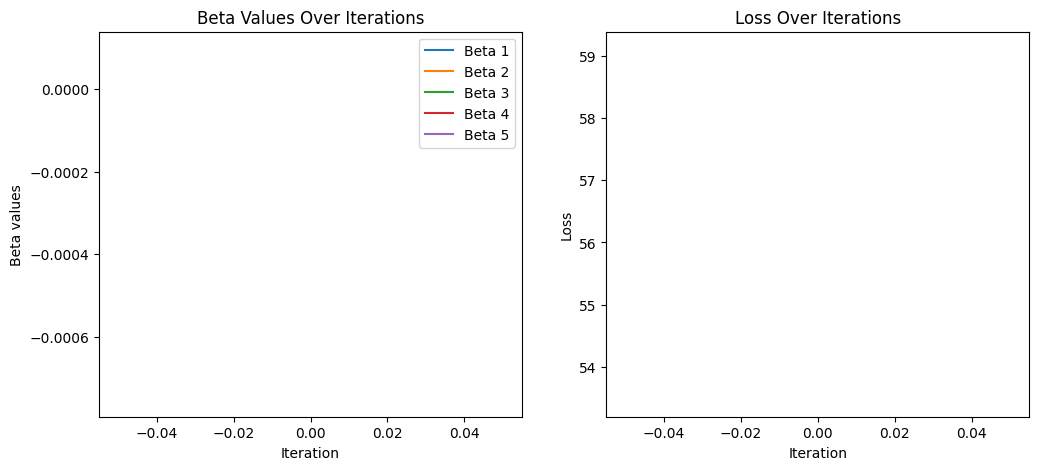

Ordinary Huber Regression Coefficients: [ 0.67765123 -0.37787931 -0.5473576  -0.04962405 -1.61681653]
Adaptive Huber Regression Coefficients: [ 8.27994102e-05 -4.09691060e-04 -3.56592237e-04  9.52047192e-05
 -7.49706468e-04]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

# Assuming 'huberReg' is your custom class and it has been defined earlier
def robust_tau(Y,n, c=0.5, dim='low'):
    if dim == 'low':
        return c*np.std(Y, ddof=1)*((n/np.log(n))**1/2)
    if dim == 'high':
        return c*c*np.std(Y, ddof=1)*((n/(np.log(n)*np.log(d)))**1/2)
def robust_reg_weight_low(x, gamma=1):
    return np.where(x>gamma, gamma/x, 1)

def huber_loss_score_function(x, tau):
    
    # Calculate the score function
    score = np.where(np.abs(x) <= tau, x, tau * np.sign(x))
    return score

def huber_loss(residuals, tau):
    """
    Calculate the Huber loss.

    Parameters:
    residuals : numpy array
        The residuals (difference between observed and predicted values).
    tau : float
        The threshold parameter for the Huber loss.

    Returns:
    numpy array
        The Huber loss for each residual.
    """
    abs_residuals = np.abs(residuals)
    return np.where(abs_residuals <= tau, 0.5 * residuals ** 2, tau * (abs_residuals - 0.5 * tau))

# Now, you can use this function in your ada_huber_reg_lowdim_debug function

        
def ada_huber_reg_lowdim_debug(X, Y, beta0, maxit, eta, epsilon=10**(-3), tau=None):
    n, d = X.shape
    if beta0 is None:
        beta0 = np.zeros(d)

    if tau is None:
        tau = robust_tau(Y, n)  # Implement robust_tau according to your definition

    beta1 = beta0
    res = Y - X.dot(beta1)
    l2 = 1
    count = 0

    beta_history = []  # To store beta values at each iteration
    loss_history = []  # To store loss values at each iteration

    while count < maxit and l2 > epsilon:
        # Compute gradient
        grad1 = -eta * X.T.dot(huber_loss_score_function(res, tau) * robust_reg_weight_low(np.sum(X**2, axis=1)**0.5)) / n
        beta0 = beta1
        beta1 += -grad1
        res = Y - X.dot(beta1)
        l2 = np.sqrt(np.sum((beta1 - beta0) ** 2))

        # Store history
        beta_history.append(beta1.copy())
        current_loss = np.sum(huber_loss(res, tau))  # Compute the current loss
        loss_history.append(current_loss)

        count += 1

    return beta1, [res, tau, count], beta_history, loss_history


def plot_diagnostics(beta_history, loss_history):
    plt.figure(figsize=(12, 5))

    # Plot beta values
    plt.subplot(1, 2, 1)
    beta_history = np.array(beta_history)
    for i in range(beta_history.shape[1]):
        plt.plot(beta_history[:, i], label=f'Beta {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Beta values')
    plt.title('Beta Values Over Iterations')
    plt.legend()

    # Plot loss values
    plt.subplot(1, 2, 2)
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss Over Iterations')

    plt.show()

# Generate a smaller, simpler dataset for debugging
n, d = 100, 5  # Smaller dataset
X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
truebeta = np.random.normal(0, 1, d)
truebeta /= np.linalg.norm(truebeta)
Y = X.dot(truebeta) + np.random.normal(0, 1, n)

# Run the regression with debugging
beta0 = np.zeros(d)
result, details, beta_history, loss_history = ada_huber_reg_lowdim_debug(X, Y, beta0, 1000, 0.01)

# Plot diagnostic plots
plot_diagnostics(beta_history, loss_history)

# Compare with a baseline model (Ordinary Huber Regression)
huber_reg = HuberRegressor().fit(X, Y)
print("Ordinary Huber Regression Coefficients:", huber_reg.coef_)
print("Adaptive Huber Regression Coefficients:", result)


In [35]:
loss_history

[56.293515197657726]

In [36]:
beta_history

[array([ 8.27994102e-05, -4.09691060e-04, -3.56592237e-04,  9.52047192e-05,
        -7.49706468e-04])]